In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import optax
from functools import partial
from field import cic_ma

In [15]:
def loss(pos : jax.Array, mass : jax.Array, grid_star : jax.Array) -> jax.Array:
    grid_size = grid_star.shape[0]
    grid = cic_ma(pos, mass, grid_size)

    loss = jnp.mean((grid - grid_star)**2)
    return loss

In [20]:
def optimize(pos, mass, grid_star : jax.Array, n_steps : int) -> jax.Array:

    optimizer = optax.adam(1e-2)
    opt_state = optimizer.init(pos)

    loss_grad = jax.grad(loss, argnums=(0))

    @jax.jit
    def step(pos, mass, opt_state):
        grad = loss_grad(pos, mass, grid_star)
        updates, opt_state = optimizer.update(grad, opt_state)
        pos = optax.apply_updates(pos, updates)
        return pos, opt_state
    
    for i in range(n_steps):
        pos, opt_state = step(pos, mass, opt_state)
        print(loss(pos, mass, grid_star))

    return pos

In [21]:
N = 10000
grid_size = 10
dx = 0.1

key = jax.random.key(0)

key_pos, key_weight = jax.random.split(key)

# create particles
pos = jax.random.uniform(key_pos, (3, N))
weight = jax.random.uniform(key_weight, (N,))

# assign particles 
grid_star = cic_ma(pos, weight, grid_size)

print(grid_star.mean())

4.986879


0.35014108
0.26301008
0.3629744
0.32924074
0.23691934
0.16706562
0.13417692
0.12292707
0.11767631
0.11018332
0.09776467
0.08314276
0.070919275
0.06253932
0.056803036
0.051870607
0.046456784
0.04143438
0.037844718
0.03525622
0.03233153
0.028671777
0.02498126
0.022242479
0.020835234
0.020045608
0.018926654
0.017214354
0.0150836855
0.012953959
0.011369568
0.010625837
0.010555755
0.010618803
0.010223467
0.009219034
0.0079860855
0.0069753155
0.0063590454
0.0061071254
0.0060885386
0.0060559036
0.0057728747
0.005244111
0.004714605
0.004428934
0.0044011823
0.0044057784
0.0042429646
0.003940096
0.0036610821
0.0035142242
0.0034935363
0.0035006092
0.0034269327
0.0032880146
0.003167893
0.003091481
0.0030341311
0.0029778196
0.0029286528
0.0028909424
0.002859814
0.0028272215
0.0027868163
0.002746905
0.0027156924
0.0026939705
0.0026757033
0.0026571848
0.0026402853
0.002620617
0.0025987779
0.0025823358
0.002575938
0.0025736738
0.0025648747
0.0025493184
0.0025350223
0.0025278765
0.0025250483
0.00252152

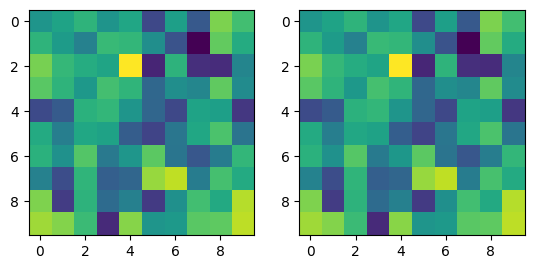

In [23]:
key = jax.random.key(1)

key_pos, key_weight = jax.random.split(key)

pos = jax.random.uniform(key_pos, (3, N)) 
weight = jax.random.uniform(key_weight, (N, ))

pos = optimize(pos, weight, grid_star, 100)

grid = cic_ma(pos, weight, grid_size)

# plot side by side
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(grid_star.sum(axis=0))
plt.subplot(1, 2, 2)
plt.imshow(grid.sum(axis=0))
plt.show()